# Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,precision_recall_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Import the input files

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [3]:
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv');
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv');
test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv');

In [4]:
movies

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN
143256,wonder_hermione_granger_hulk_v,Wonder Hermione Granger Hulk V,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Dwayne Clayton,NaN,NaN,NaN


In [5]:
train

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [6]:
train.shape

(162758, 5)

In [7]:
test

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...
...,...,...,...,...
55310,celestial_radiant,Jose Mccormick,False,Ron Howard delivers an unconventional romantic...
55311,vivid_james_t._kirk,Thomas Osborne,False,As an oddball art film that openly invites you...
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,Julie Kirby,False,Nicholson wears his devilish grin from his fir...
55313,terminator_epic_rocky_balboa_mystic,Tina Sutton,True,It's hard not be entertained by two dozen of C...


In [8]:
test.shape

(55315, 4)

In [9]:
train_movies_df = pd.merge(movies,train,how='inner',on='movieid')
test_movies_df = pd.merge(movies,test,how='inner',on='movieid')

In [10]:
train_movies_df.shape

(525277, 18)

In [11]:
test_movies_df.shape

(172615, 17)

In [12]:
train_movies_df.isna().sum()

movieid                      0
title                        0
audienceScore           300829
rating                  390791
ratingContents          390791
releaseDateTheaters     342951
releaseDateStreaming    275844
runtimeMinutes          222688
genre                   217333
originalLanguage        220455
director                     0
boxOffice               380216
distributor             355592
soundType               415919
reviewerName                 0
isFrequentReviewer           0
reviewText               23817
sentiment                    0
dtype: int64

In [13]:
test_movies_df.isna().sum()

movieid                      0
title                        0
audienceScore            98204
rating                  130565
ratingContents          130565
releaseDateTheaters     113625
releaseDateStreaming     90172
runtimeMinutes           72478
genre                    70701
originalLanguage         71715
director                     0
boxOffice               126423
distributor             118039
soundType               137908
reviewerName                 0
isTopCritic                  0
reviewText                8496
dtype: int64

# Split the data into train and test

In [14]:
y_train = train_movies_df.iloc[:,[-1]]
X_train = train_movies_df.iloc[:,[2,7,15]]

In [15]:
X_test = test_movies_df.iloc[:,[2,7,15]]

# Dummy Classifier

In [16]:
dummy_clf = DummyClassifier()

In [17]:
dummy_clf.fit(X_train, y_train)

DummyClassifier()

In [18]:
output = dummy_clf.predict(test)

In [19]:
y_train_predict = dummy_clf.predict(X_train)

In [20]:
df = pd.DataFrame(data=output,columns=['sentiment'])

In [21]:
df.shape

(55315, 1)

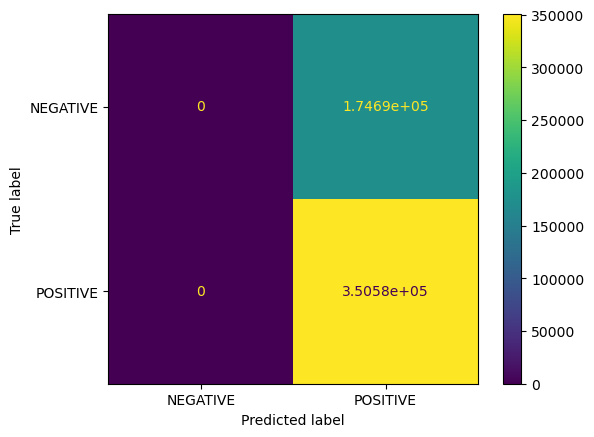

In [22]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict,values_format='.5g')
plt.show()

In [23]:
print(classification_report(y_train,y_train_predict,zero_division=0))

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00    174694
    POSITIVE       0.67      1.00      0.80    350583

    accuracy                           0.67    525277
   macro avg       0.33      0.50      0.40    525277
weighted avg       0.45      0.67      0.53    525277



In [24]:
#df.to_csv('submission.csv',index_label='id')

# Logistic Regression

In [25]:
model = LogisticRegression()
solvers = ['saga', 'sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter =[10000]
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iter)


In [26]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring='accuracy',error_score=0)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525277 entries, 0 to 525276
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   audienceScore       224448 non-null  float64
 1   runtimeMinutes      302589 non-null  float64
 2   isFrequentReviewer  525277 non-null  bool   
dtypes: bool(1), float64(2)
memory usage: 12.5 MB


In [28]:
num_pipeline = Pipeline([('selector',ColumnTransformer([('select_first_2',
                                                         'passthrough',
                                                         slice(0,2))])),
                         ('imputer',SimpleImputer(strategy="mean")),
                         ('std_scaler',StandardScaler()),
                        ])

In [29]:
cat_pipeline = ColumnTransformer([('ordinal_encoder',OrdinalEncoder(),[2]),
                                ])

In [30]:
X_train

,audienceScore,runtimeMinutes,isFrequentReviewer
0,65.0,120.0,False
1,65.0,120.0,False
2,65.0,120.0,False
3,65.0,120.0,False
4,65.0,120.0,True
...,...,...,...
525272,47.0,86.0,True
525273,47.0,86.0,False
525274,47.0,86.0,True
525275,47.0,86.0,True


In [31]:
full_pipeline = FeatureUnion(transformer_list=
                             [("num_pipeline",num_pipeline),
                              ("cat_pipeline",cat_pipeline),
                             ])

In [32]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_2',
                                                                                  'passthrough',
                                                                                  slice(0, 2, None))])),
                                                ('imputer', SimpleImputer()),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('ordinal_encoder',
                                                                 OrdinalEncoder(),
                                                                 [2])]))])

In [33]:
X_train_transformed=full_pipeline.fit_transform(X_train)

In [34]:
y_train

,sentiment
0,POSITIVE
1,POSITIVE
2,POSITIVE
3,POSITIVE
4,NEGATIVE
...,...
525272,POSITIVE
525273,POSITIVE
525274,POSITIVE
525275,NEGATIVE


In [35]:
y_train_array = y_train.to_numpy()

In [36]:
X_train_transformed

array([[ 0.12451159,  0.88221083,  0.        ],
       [ 0.12451159,  0.88221083,  0.        ],
       [ 0.12451159,  0.88221083,  0.        ],
       ...,
       [-1.18510992, -0.83733396,  1.        ],
       [-1.18510992, -0.83733396,  1.        ],
       [-1.18510992, -0.83733396,  0.        ]])

In [37]:
grid_search.fit(X_train_transformed,y_train_array.ravel())

GridSearchCV(error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'max_iter': [10000],
                         'penalty': ['l2'], 'solver': ['saga', 'sag']},
             scoring='accuracy')

In [38]:
X_test_transformed=full_pipeline.fit_transform(X_test)

In [39]:
y_predict = grid_search.predict(X_test_transformed)
y_train_predict = grid_search.predict(X_train_transformed)

In [40]:
df_L_R = pd.DataFrame(data=y_predict,columns=['sentiment'])

In [41]:
df_L_R=df_L_R.iloc[:55315]

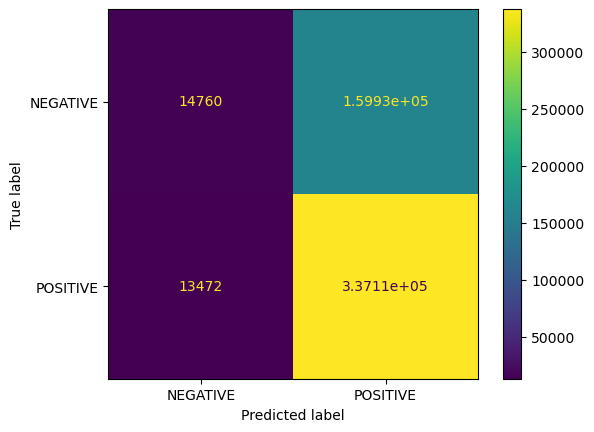

In [42]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict,values_format='.5g')
plt.show()

In [43]:
print(classification_report(y_train,y_train_predict,zero_division=0))

              precision    recall  f1-score   support

    NEGATIVE       0.52      0.08      0.15    174694
    POSITIVE       0.68      0.96      0.80    350583

    accuracy                           0.67    525277
   macro avg       0.60      0.52      0.47    525277
weighted avg       0.63      0.67      0.58    525277



In [44]:
#df_L_R.to_csv('submission.csv',index_label='id')

# K Nearest Neighbours

In [45]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 3)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train_transformed,y_train_array.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2])})

In [46]:
y_predict = knn_gscv.predict(X_test_transformed)
y_train_predict = knn_gscv.predict(X_train_transformed)

In [47]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [48]:
knn_gscv.best_score_

0.556995772763851

In [49]:
df_K_N_N = pd.DataFrame(data=y_predict,columns=['sentiment'])

In [50]:
df_K_N_N=df_K_N_N.iloc[:55315]

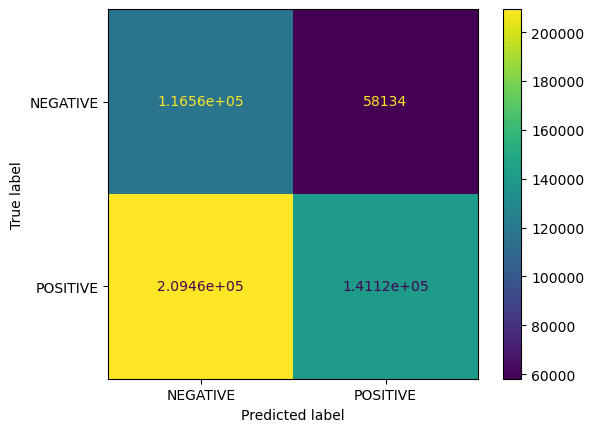

In [51]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict,values_format='.5g')
plt.show()

In [52]:
print(classification_report(y_train,y_train_predict,zero_division=0))

              precision    recall  f1-score   support

    NEGATIVE       0.36      0.67      0.47    174694
    POSITIVE       0.71      0.40      0.51    350583

    accuracy                           0.49    525277
   macro avg       0.53      0.53      0.49    525277
weighted avg       0.59      0.49      0.50    525277



In [53]:
#df_K_N_N.to_csv('submission.csv',index_label='id')

# SVM

In [54]:
clf = svm.SVC()
clf.fit(X_train_transformed[:55315],y_train_array[:55315].ravel())

SVC()

In [55]:
y_predict = clf.predict(X_test_transformed[:55315])
y_train_predict = clf.predict(X_train_transformed[:55315])

In [56]:
df_SVM = pd.DataFrame(data=y_predict,columns=['sentiment'])

In [57]:
df_SVM=df_SVM.iloc[:55315]

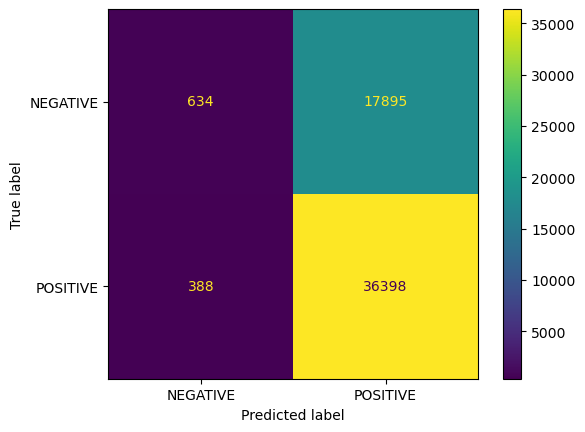

In [58]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train[:55315],y_train_predict,values_format='.5g')
plt.show()

In [59]:
print(classification_report(y_train[:55315],y_train_predict,zero_division=0))

              precision    recall  f1-score   support

    NEGATIVE       0.62      0.03      0.06     18529
    POSITIVE       0.67      0.99      0.80     36786

    accuracy                           0.67     55315
   macro avg       0.65      0.51      0.43     55315
weighted avg       0.65      0.67      0.55     55315



In [60]:
df_SVM.to_csv('submission.csv',index_label='id')

# Decision Tree Classifier

In [61]:
tree_para = {'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[3,4,5,6],'min_samples_leaf':[2,4,6,8,10]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_para, cv=4)
clf.fit(X_train_transformed, y_train_array)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [62]:
clf.best_score_

0.6705833356830256

In [63]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'splitter': 'random'}

# BaggingClassifier

In [64]:
clf = BaggingClassifier(estimator=svm.SVC(),n_estimators=10, random_state=0).fit(X_train_transformed[:55315], y_train_array[:55315].ravel())

In [65]:
y_predict = clf.predict(X_test_transformed[:55315])
y_train_predict = clf.predict(X_train_transformed[:55315])

In [66]:
clf.score(X_train_transformed[:55315], y_train_array[:55315].ravel())

0.6695652173913044

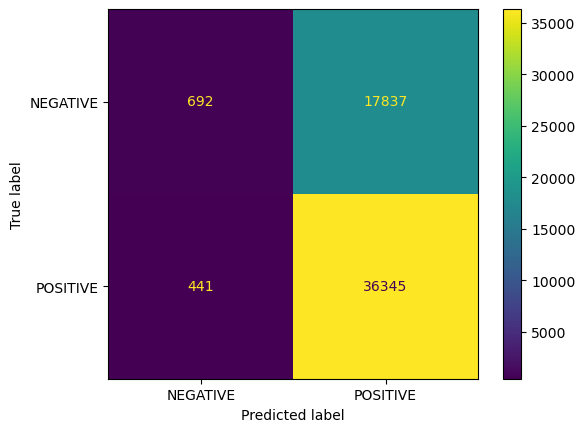

In [67]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train[:55315],y_train_predict,values_format='.5g')
plt.show()

# AdaBoostClassifier

In [68]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [69]:
clf.fit(X_train_transformed[:55315], y_train_array[:55315].ravel())

AdaBoostClassifier(n_estimators=100, random_state=0)

In [70]:
y_predict = clf.predict(X_test_transformed[:55315])
y_train_predict = clf.predict(X_train_transformed[:55315])

In [71]:
clf.score(X_train_transformed[:55315], y_train_array[:55315].ravel())

0.669492904275513

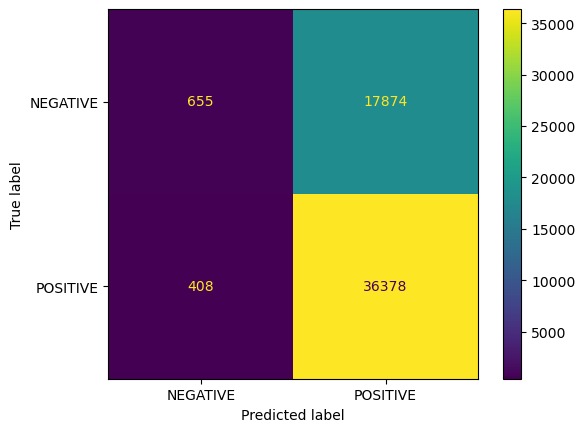

In [72]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train[:55315],y_train_predict,values_format='.5g')
plt.show()

# MLPClassifier

In [73]:
clf = MLPClassifier(random_state=1, max_iter=300)

In [74]:
clf.fit(X_train_transformed[:55315], y_train_array[:55315].ravel())

MLPClassifier(max_iter=300, random_state=1)

In [75]:
y_predict = clf.predict(X_test_transformed[:55315])
y_train_predict = clf.predict(X_train_transformed[:55315])

In [76]:
clf.score(X_train_transformed[:55315], y_train_array[:55315].ravel())

0.667630841543885

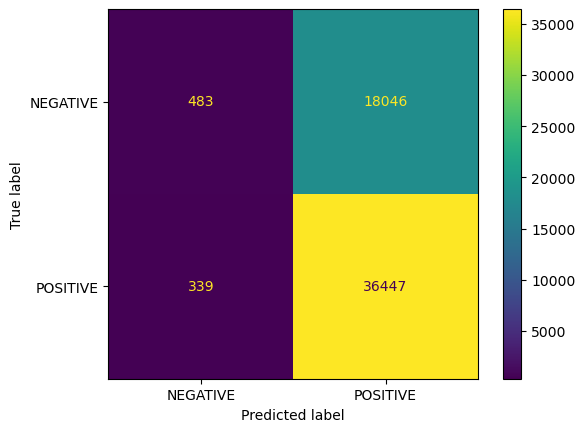

In [77]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train[:55315],y_train_predict,values_format='.5g')
plt.show()

# Comparing all the above

In [78]:
from sklearn import model_selection

In [79]:
from sklearn import model_selection

In [80]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', svm.SVC()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('BC',BaggingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('MLPC',MLPClassifier()))

In [81]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X_train_transformed[:55315], y_train[:55315], cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

LR: 0.665028 (0.021216)


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KNN: 0.503477 (0.097948)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVM: 0.664269 (0.021065)
DTC: 0.648144 (0.025897)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

BC: 0.651036 (0.024741)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

ABC: 0.659858 (0.023542)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

MLPC: 0.665028 (0.021216)


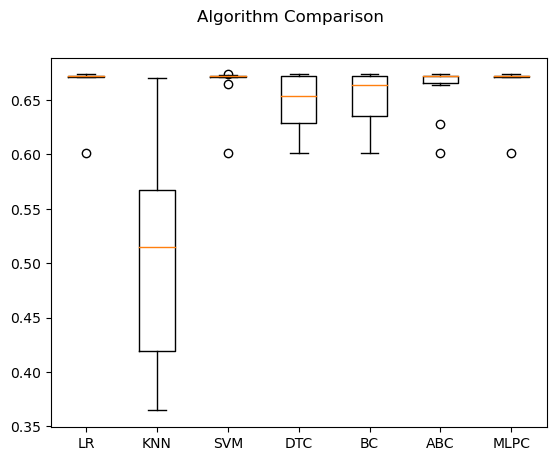

In [82]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()